In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

First of all, as in all Data Science exercises, we have to understand the data we are working with.

In [12]:
# Nº of rows and columns
house_df.shape

(21613, 21)

In [13]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
# Concise summary of the 'df', containing also the type of the variables
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
# Basic statistics for variables (not all of them are relevant as not all of them are numerical, but for understanding the 'df' is fine)
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
# Nº of NaN (missing values) in each column
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values in any of the variables from the 'df'

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [17]:
#a)

# Define the feature (sqft_living) and target variable (price)
X = house_df.sqft_living.values.reshape(-1, 1)
y = house_df.price.values.reshape(-1)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the provided data
model.fit(X, y)

LinearRegression()

Model Intercept: -43580.74309447361
Model Coefficient: 280.6235678974481
R-squared: 0.4928532179037931


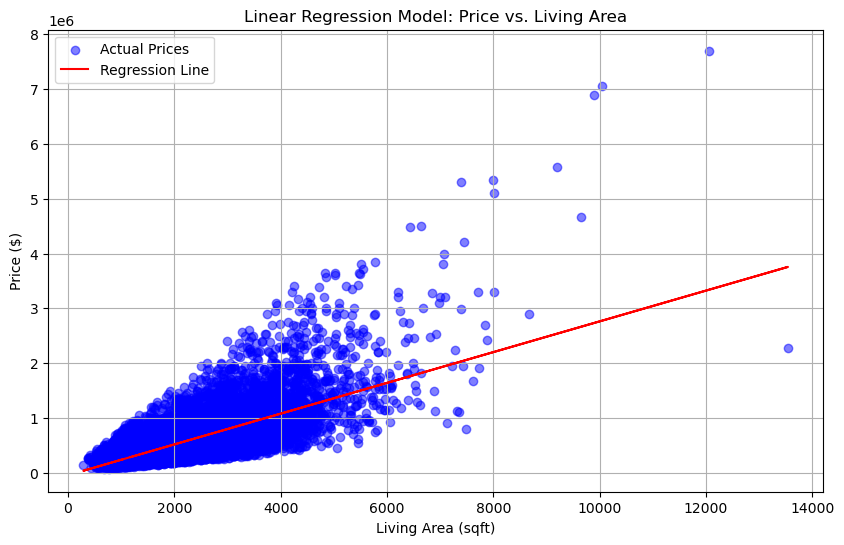

In [18]:
#b)

#Your code:

# Predict prices using the trained model
y_pred = model.predict(X)

# Extract and display model attributes
intercept = model.intercept_
coefficient = model.coef_[0]
r_squared = model.score(X, y)

# Print model parameters and R-squared
print(f"Model Intercept: {intercept}")
print(f"Model Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")

# Visualize the actual vs predicted prices along with the regression line
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Prices', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression Model: Price vs. Living Area')
plt.legend()
plt.grid(True)
plt.show()


The linear regression model shows a positive relationship between living area (sqft) and house price, with an estimated increase of $280.62 in price for every additional square foot. The intercept is $-43580.74, which does not make much practical sense since a house with zero square feet wouldn’t exist, but it’s part of how the regression line is calculated mathematically. The R-squared value of 0.4928 means the model with living area (sqft) explains about 49.28% of the variation in house prices, so there are still a lot of other factors that affect price beyond just the size of the home. Looking at the graph, we can see that the data points are pretty spread out, especially for larger homes, where the prices vary a lot more. This shows that while bigger homes tend to cost more, living area alone isn’t enough to accurately predict house prices because things like nº bedrooms, floors, condition, and other features also play a big role.

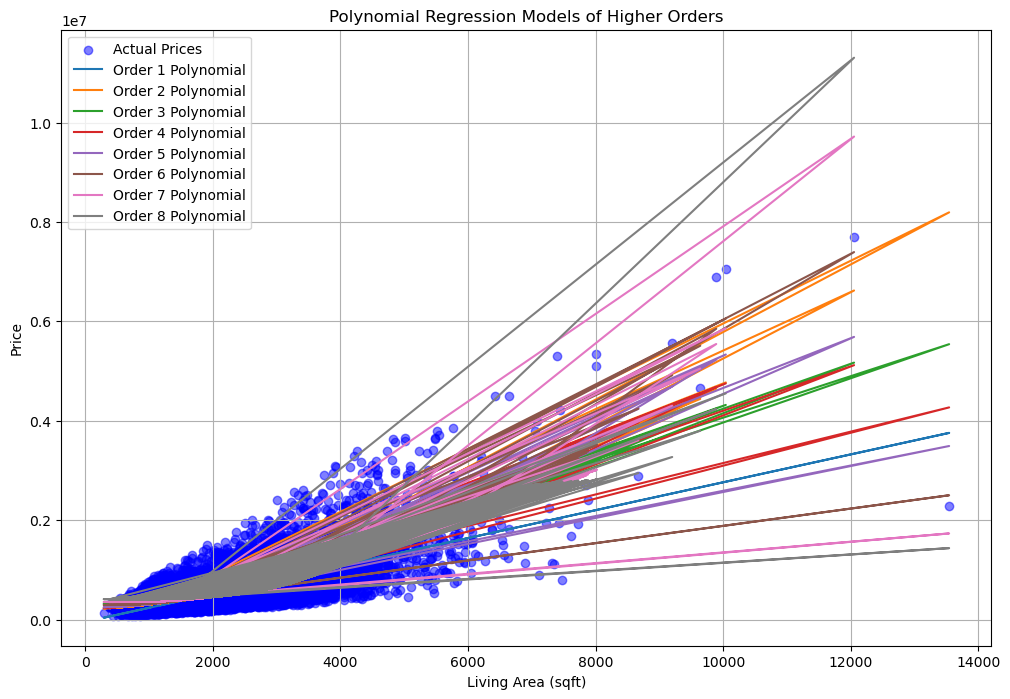

   Degree           MSE            MAE
0       1  6.835129e+10  173688.273360
1       2  6.297508e+10  165737.567348
2       3  6.213119e+10  165891.778525
3       4  6.180249e+10  165352.302856
4       5  6.151209e+10  165375.474389
5       6  6.079324e+10  165429.535923
6       7  6.125537e+10  166636.159459
7       8  6.583225e+10  171876.708645


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dictionary to store MSE and MAE for each polynomial degree
performance_metrics = {'Degree': [], 'MSE': [], 'MAE': []}

# Plot the original data points
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Actual Prices', alpha=0.5)

# Loop through polynomial degrees from 1 to 8
for order in range(1, 9):
    # Create polynomial features
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    
    # Initialize and fit the polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_order, y)
    
    # Predict using the model
    y_pred_order = model_poly.predict(X_order)
    
    # Calculate MSE and MAE
    mse = mean_squared_error(y, y_pred_order)
    mae = mean_absolute_error(y, y_pred_order)
    
    # Store performance metrics
    performance_metrics['Degree'].append(order)
    performance_metrics['MSE'].append(mse)
    performance_metrics['MAE'].append(mae)
    
    # Plot each polynomial regression line
    plt.plot(X, y_pred_order, label=f'Order {order} Polynomial')

# Label the plot
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Polynomial Regression Models of Higher Orders')
plt.legend()
plt.grid(True)
plt.show()

# Display the performance metrics as a DataFrame
performance_df = pd.DataFrame(performance_metrics)
print(performance_df)


The polynomial regression analysis illustrates how increasing the polynomial degree improves the model's ability to capture the relationship between living area and house prices. Starting with the 1st-degree model (linear regression), we observe the highest Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating that a simple linear fit is insufficient for representing the data's complexity. As we raise the polynomial degree, particularly between the 2nd and 6th degrees, both MSE and MAE decrease steadily. This trend suggests that these higher-degree models better capture the nonlinear relationship, providing a more accurate fit to the data.

The 4th and 5th-degree models show significant accuracy improvements over the linear model, balancing increased flexibility without becoming overly complex. The 6th-degree model achieves the lowest errors, implying it may offer the best fit for this dataset. However, when we move to the 7th and 8th degrees, errors begin to rise slightly, which suggests that these models may be overfitting—capturing noise rather than a general trend in the data. In the graph, the lines for the 7th and 8th-degree models appear more intricate, which could mean they fit the current data closely but may not perform well on new data.

Overall, this analysis suggests that a polynomial degree between 4 and 6 provides a good balance, capturing the main trends without overfitting. These mid-range degrees keep errors low and allow the model to generalize better, making them potentially more reliable for predicting house prices based on living area. This insight is useful in guiding us towards a model that is both accurate and generalizable.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

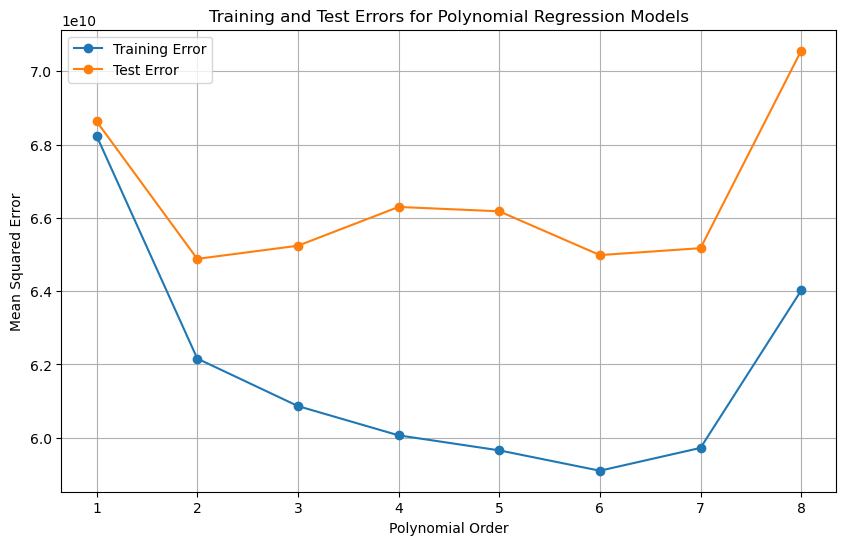

In [20]:
#a)

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Loop through polynomial degrees from 1 to 8
for order in range(1, 9):
    # Create polynomial features for the current order
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    # Initialize and train the polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_train_pred = model_poly.predict(X_train)
    y_test_pred = model_poly.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) for both training and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and test errors for each polynomial order
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), train_errors, marker='o', label='Training Error')
plt.plot(range(1, 9), test_errors, marker='o', label='Test Error')
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for Polynomial Regression Models')
plt.legend()
plt.grid(True)
plt.show()


The plot shows how the mean squared error (MSE) changes for both the training and test datasets as the polynomial order increases. For the training error, we can see a consistent decrease as the polynomial order gets higher, which makes sense because more complex models (higher-order polynomials) can better fit the training data, even capturing small details and noise. However, the test error behaves differently: it decreases initially, reaching its lowest point around polynomial orders 3 or 4, and then starts increasing again as the order goes higher.

This pattern highlights the issue of overfitting. For lower orders (like 1 or 2), the model is too simple and underfits the data, leading to high errors in both training and test sets. As the order increases to 3 or 4, the model is complex enough to capture the main trend in the data without overfitting, resulting in lower test errors. But with very high orders (like 7 or 8), the model becomes overly specialized to the training data, fitting noise or outliers instead of the actual trend. This causes the test error to rise, as the model performs poorly on unseen data.

The gap between training and test error for higher orders clearly shows the bias-variance tradeoff. Low-order models have high bias (too simple to represent the data), while high-order models have high variance (too complex and sensitive to noise). Based on the plot, the sweet spot seems to be between orders 2 and 4, where the test error is minimized and the model is neither underfitting nor overfitting. This suggests that simpler models often generalize better, which is important to keep in mind when working with real-world datasets like housing prices.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

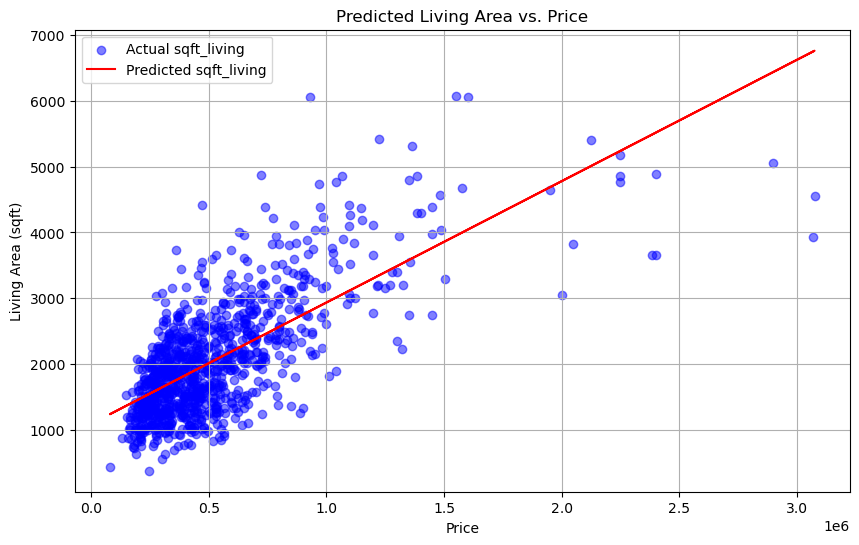

In [21]:
#a)

# Define the feature as 'price' and the target as 'sqft_living' for the first 1000 entries
X = house_df.price.values.reshape(-1, 1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the actual vs. predicted square footage
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual sqft_living', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Predicted sqft_living')
plt.xlabel('Price')
plt.ylabel('Living Area (sqft)')
plt.title('Predicted Living Area vs. Price')
plt.legend()
plt.grid(True)
plt.show()


This graph presents a simple linear regression model aimed at predicting living area (sqft) based solely on property price, represented by the straight red line. The model identifies a positive trend, indicating that larger properties generally have higher prices. However, the wide dispersion of actual data points around the regression line (especially at higher price ranges) highlights significant limitations in using price alone to predict living area. This variance suggests that additional factors, such as location (zipcode), property condition, or features like waterfront access, play a crucial role in determining living area but are not accounted for in this model.

The underperformance at higher price points likely stems from the increased variability in luxury or custom-built homes, where price may be influenced more by features unrelated to size. To improve prediction accuracy, a multiple linear regression model incorporating other variables that strongly correlate with both price and living area (e.g., number of bedrooms) would provide a more comprehensive analysis. This approach would help address the observed variability and produce more reliable predictions by accounting for the multifaceted nature of real estate pricing.

In [22]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749056521.056175


In [23]:
#  My Model

import statsmodels.api as sm  # Import statsmodels

# Define initial features (columns from the dataset)
features = [
    'sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'bathrooms',
    'condition', 'yr_built', 'yr_renovated', 'floors', 'waterfront', 
    'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

# Define X and y
X = house_df[features]
y = house_df['price']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Variables to track the best model
variables = list(X.columns)  # Track active variables
best_mse = float('inf')
best_variables = variables.copy()

# Backward elimination process
while True:
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Calculate the MSE for the current model
    mse = model.mse_resid  # Residual mean squared error
    print(f"Current MSE: {mse}, Variables: {variables}")
    
    # Update the best MSE if the current model has a lower MSE
    if mse < best_mse:
        best_mse = mse
        best_variables = variables.copy()
    else:
        # If removing variables doesn't improve the model, break the loop
        break
    
    # Get p-values of each variable (excluding the intercept)
    p_values = model.pvalues[1:]  # Exclude the intercept
    max_p_value = p_values.max()
    
    # If all p-values are significant (p < 0.05), stop
    if max_p_value < 0.05:
        break
    
    # Remove the variable with the highest p-value
    max_p_index = p_values.idxmax()  # Get column name of max p-value
    variable_to_remove = max_p_index
    print(f"Removing variable: {variable_to_remove}")
    
    # Drop the variable from X
    X = X.drop(columns=[variable_to_remove])
    variables.remove(variable_to_remove)

# Final result
print(f"Best MSE: {best_mse}")
print("Selected variables:", best_variables)


Current MSE: 41188082393.06571, Variables: ['const', 'sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'bathrooms', 'condition', 'yr_built', 'yr_renovated', 'floors', 'waterfront', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Best MSE: 41188082393.06571
Selected variables: ['const', 'sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'bathrooms', 'condition', 'yr_built', 'yr_renovated', 'floors', 'waterfront', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


This multiple linear regression model is an effective approach for predicting house prices in the kc_houses dataset due to its robust feature selection process and the use of statistically significant predictors. By employing backward elimination, the model iteratively removes the least significant features based on p-values, ensuring that only variables with a strong relationship to house prices are retained (if a variable's p-value is less than 0.05, it suggests that the variable significantly influences the dependent variable, rejecting the null hypothesis). This process helps avoid overfitting, where irrelevant or redundant features could distort the model’s ability to generalize to new data. The features chosen, such as sqft_living, grade, view, bedrooms, bathrooms, waterfront, and yr_built, are all highly relevant to the price of a home, capturing important aspects like the size, quality, and desirability of a property. For instance, the square footage of the house (sqft_living) and whether the house is on a waterfront (waterfront) have direct and well-established impacts on price. By focusing on statistically significant variables, the model improves its predictive accuracy while reducing the complexity of the model, which leads to better interpretability and lower chances of overfitting. The model’s mean squared error (MSE), which measures the average squared difference between observed and predicted house prices, is minimized through this process, indicating that the final model is optimally fit to the data.